<div class="alert alert-block alert-warning">
<h2><span style="color:green"> Notebook for RNN, LSTM </span><h2>
</div>
    
---
---

## Recurrent Neural Network(RNN)
**Recurrent Neural Networks(RNNs)** are a type of neural network where the **output from previous step is fed as input to the current step.** RNNs are used to tackle problems that requires knowledge from the past to make a prediction such as predicting next word in a sentence. RNN does this by maintaing a "memory" through a vector called **Hidden State**.

 At each time step $t$, an instance of a sequence $x_t\in\mathbb{R}^D$ and previous hidden state $h_{t-1}\in\mathbb{R}^H$  are passed to RNN. Using these two inputs, hidden state $h_t$ gets updated. The learnable parameters of the RNN are $(W_x\in\mathbb{R}^{H\times D}, W_h\in\mathbb{R}^{H\times H},b\in\mathbb{R}^{H} )$  input-to-hidden matrix , a hidden-to-hidden matrix  and a bias vector respectively.

$$ h_t = tanh(W_{x}x_t + W_{h}h_{_{t-1}}+b) $$


![RNN_folded_unfolded.png](attachment:RNN_folded_unfolded.png)
<center>A folded (left) and un-folded (right) version of an RNN. <b>A</b> is feed forward neural network followed by an activation function. </center> 

<center> <a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/" title="colah's blog">
Image Source</a></center>


In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> One Fully-Connected Layer using nn.Linear  </span></h1>
</div>

Input row-vector is $x=[1,2,3]$

In [2]:
x= [1,2,3]

fc_layer = nn.Linear(len(x), 10, bias=True)
tensor_input = torch.FloatTensor(x)
output = fc_layer(tensor_input)

print('Dimension of Input        : ' , tensor_input.dim())
print('Dimension of Output       : ' , output.dim())
print('Dimension of Weights Matrix: ' , fc_layer.weight.dim())
print('Weights Matrix shape: ' , fc_layer.weight.shape)
print('Dimension of Bias Vector  : ' , fc_layer.bias.dim())
print('Dimension Vector shape: ' , fc_layer.bias.shape)


print('\n\n\n')
print('Weights Matrix of Fully-Connected Layer:\n', fc_layer.weight)
print('\n\n\nBias Vector of Fully-Connected Layer:\n',  fc_layer.bias)
print('\n\n\nOutput:\n', output)

Dimension of Input        :  1
Dimension of Output       :  1
Dimension of Weights Matrix:  2
Weights Matrix shape:  torch.Size([10, 3])
Dimension of Bias Vector  :  1
Dimension Vector shape:  torch.Size([10])




Weights Matrix of Fully-Connected Layer:
 Parameter containing:
tensor([[-0.3022,  0.1795, -0.2554],
        [-0.2759,  0.0609,  0.5240],
        [-0.3625,  0.2213, -0.2127],
        [ 0.4499,  0.2692, -0.0484],
        [-0.4163,  0.5276, -0.4244],
        [-0.3087, -0.4043, -0.3142],
        [-0.3976,  0.2231,  0.0776],
        [-0.4889,  0.0852,  0.1825],
        [ 0.2134,  0.4461,  0.1765],
        [-0.5164, -0.1690, -0.3482]], requires_grad=True)



Bias Vector of Fully-Connected Layer:
 Parameter containing:
tensor([-0.0390,  0.3639, -0.1948,  0.5256,  0.2918, -0.3366, -0.2461,  0.5035,
         0.2364,  0.4523], requires_grad=True)



Output:
 tensor([-0.7484,  1.7819, -0.7528,  1.3688, -0.3423, -2.3963,  0.0353,  0.7325,
         1.8715, -1.4468], grad_fn=<AddBackward0

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> A Single-layer RNN  </span></h1>
</div>

In [3]:
class SimpleRNN(nn.Module):
    
    def __init__(self,input_dim, hidden_dim):

        super().__init__()

        self.input_dim  = input_dim
        self.hidden_dim = hidden_dim

        
        # Initialize W_x and W_h 
        # Bias terms are included in nn.Linear, so no need to initialize separate bias vector

        self.W_x = nn.Linear(input_dim, hidden_dim) 
        self.W_h = nn.Linear(hidden_dim, hidden_dim) 



    def rnn_step(self, inp, hidden):
        
        """ Implementation of Single-layer RNN ONE Time Step
            
            Args:
            
                  inp   : input of shape( batch_size, input_dim)
                  hidden: previous hiedden state h_(t-1)
            
            
            Returns:
                     h_t : updated hidden state after ONE time step 
            """

        
        prev_h = hidden
        h_t = None
                
        # TODO: Implement one time step and update h
        ### tanh(W_xt + W_ht-1 + b )


        h_t = torch.tanh(self.W_x(inp) + self.W_h(prev_h)) 

        return h_t


    def forward(self, inp):
        # Input should be of shape(seq_dim, batch_size, input_dim)

        seq_dim, batch_size , _ = inp.shape

        
        # Initialize hidden state with zeros and shape(batch_size, hidden_dim)
        # In case of batch gradient descent we have to maintain hidden vector 
        # for each training example in the batch
        
        h = torch.zeros(batch_size,self.hidden_dim)

        
        # Loop through the whole sequence and update h_t at every time step
        for x in inp:
            # x is of shape (batch_size, input_dim)
            h = self.rnn_step(x , h)
        
        return h 


#### Output of RNN after T time steps

In [4]:
# Testing RNN: This code should run without any error

x = torch.randn(28, 1, 28) # (Seq_dim, batch_dim, inp_dim)

rnn = SimpleRNN(28, 100)

# Dimension of network parameters
print("parameters in network:-")
for name,p in rnn.named_parameters():
    print(name,"->" ,p.shape)
print("----------"*3)
    
h_last_t = rnn(x)
print(h_last_t.shape)

parameters in network:-
W_x.weight -> torch.Size([100, 28])
W_x.bias -> torch.Size([100])
W_h.weight -> torch.Size([100, 100])
W_h.bias -> torch.Size([100])
------------------------------
torch.Size([1, 100])


---
---

# LSTM
If you read recent papers, you'll see that many people use a variant on the vanilla RNN called Long-Short Term Memory (LSTM) RNNs. Vanilla RNNs can be tough to train on long sequences because it suffers from vanishing/exploding gradient problem due to repeated matrix multiplication. LSTMs solve this problem by replacing the simple update rule of the vanilla RNN with a gating mechanism as follows.


Similar to the vanilla RNN, at each time step we receive an input $x_t\in\mathbb{R}^D$ and the previous hidden state $h_{t-1}\in\mathbb{R}^H$; the LSTM also maintains an $H$-dimensional *cell state*, so we also receive the previous cell state $c_{t-1}\in\mathbb{R}^H$. The learnable parameters of the LSTM are an *input-to-hidden* matrix $W_x\in\mathbb{R}^{4H\times D}$, a *hidden-to-hidden* matrix $W_h\in\mathbb{R}^{4H\times H}$ and a *bias vector* $b\in\mathbb{R}^{4H}$.

**Points to be noted**

* *Cell State* is the internal state of LSTM. It provides a path for the flow of gradient which does not contain matrix multiplication to reduce the chances of vanishing/exploding gradient.

* *Hidden State* is the output of the LSTM

![lstm.png](attachment:lstm.png)
<center> <a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/" title="colah's blog">
Image Source</a></center>

At each time step:

**1.** An *activation vector* $a\in\mathbb{R}^{4H}$ is computed as $a=W_xx_t + W_hh_{t-1}+b$.

**2.** Activation vector is partitioned into four vectors $a_i,a_f,a_o,a_c\in\mathbb{R}^H$ where $a_i$ consists of the first $H$ elements of $a$, $a_f$ is the next $H$ elements of $a$ and so on. 

**3.** We then compute the *input gate* $(i\in\mathbb{R}^H)$, *forget gate* $(f\in\mathbb{R}^H)$, *output gate* $(o\in\mathbb{R}^H)$ and *new candidate for $c_t$* $(\tilde{c_t}\in\mathbb{R}^H)$ as

$$
\begin{align*}
i = \sigma(a_i) \hspace{2pc}
f = \sigma(a_f) \hspace{2pc}
o = \sigma(a_o) \hspace{2pc}
\tilde{c_t} = \tanh(a_c)
\end{align*}
$$

where $\sigma$ is the sigmoid function and $\tanh$ is the hyperbolic tangent, both applied element-wise.


  * *new candidate vector* ($\tilde{c_t}$) provides candidate values for new cell state ($c_t$)
  
  * *input gate* ($i$) determines the positions where data should be injected from  $\tilde{c_t}$ to new cell state ($c_t$)

  * *forget gate* ($f$) removes the useless data from previous cell state $c_{t-1}$

  * *output gate* ($o$) determines the data to pass from current cell state $c_t$ to current hidden state $h_t$
  


  
  

**4.** Finally, we update the next cell state $c_t$ and next hidden state $h_t$ as follows

$$
c_{t} = f\odot c_{t-1} + i\odot \tilde{c_t} \hspace{4pc}
h_t = o\odot\tanh(c_t)
$$

where $\odot$ is the element-wise (Hadamard) product of vectors.


<div class="alert alert-block alert-warning">
<h1><span style="color:green"> A Single-layer LSTM  </span></h1>
</div>

In [19]:
class SimpleLSTM(nn.Module):
    
    def __init__(self,input_dim, hidden_dim):

        super().__init__()

        
        self.input_dim  = input_dim
        self.hidden_dim = hidden_dim

        
        #TODO: Initialize W_x and W_h
        # Bias terms are included in nn.Linear, so no need to initialize separate bias vector
        
        self.W_x = nn.Linear(input_dim, hidden_dim*4, bias=True)
        self.W_h = nn.Linear(hidden_dim, hidden_dim*4, bias=True)



    def lstm_step(self, inp, prev_hidden_cell):
        """ Implementation of Single-layer LSTM ONE Time Step
            
            Args:
                    inp      : input of shape(batch_size, input_dim)
             prev_hidden_cell: tuple (previous_hidden_state, previous_cell_state)
            
            
            Returns:
                    Updated hidden state and cell state 
        """

        
        
        h_prev , c_prev = prev_hidden_cell
        
        
        # The activation vector
        activation = torch.tanh(self.W_x(inp) + self.W_h(h_prev))
        
        
        # The activation is split into four parts
        ai, af, ac, ao = activation.chunk(4, 1)

        
        updated_h, updated_c = None, None
      
    
        # TODO: Implement the gates of lstm and update hidden state and cell state

        in_gate     = torch.sigmoid(ai)
        forget_gate = torch.sigmoid(af)
        cell_gate   = torch.sigmoid(ac)
        out_gate    = torch.tanh(ao)

        
        updated_c  = forget_gate*c_prev + in_gate*cell_gate
        updated_h  = out_gate * torch.tanh(updated_c)
        


        return updated_h, updated_c


    def forward(self, inp):
        
        # input shape (seq_dim, batch_size, input_dim)
        seq_dim, batch_size, _ = inp.shape
        # TODO: initialize hidden and cell state and loop through sequence

        # Initialize hidden state with zeros (batch_size, hidden_dim)
        h = torch.zeros(batch_size, self.hidden_dim)
        
        # Initialize cell state with zeros (batch_size, hidden_dim)
        c = torch.zeros(batch_size, self.hidden_dim)
        
        
        # Loop through the whole sequence and update h_t and c_t at every time step
        for x in inp:
            
           # shape of x is (batch_size, input_dim )
        
           h, c = self.lstm_step( x, (h, c) )
        
        return h 


#### Output of LSTM Cell after T time steps
The final updated hidden state is the output of LSTM. After filtering the data through gates, the final hidden state can provide us with the relevant indormation for our task.

In [20]:
# Testing LSTM: The code should run with any erros

#test input of shape(Sequence_len, Batch_size , Input_dim)
x = torch.randn(28, 1 ,28)

m = SimpleLSTM(28, 100)

out = m(x)
out.shape

torch.Size([1, 100])

<div class="alert alert-block alert-warning">
<h1><span style="color:orange"> Image Classification with LSTM  </span></h1>
</div>

In this section, you  will use an LSTM network for MNIST image classification. We will use **many-to-one** scenario for this task. Refer to following figure to understand *many-to-one* LSTM.
<br>
<br>

![lstm_shapes.png](attachment:lstm_shapes.png)
<center> <a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/" title="Andrej Karpathy's blog">
Image Source</a></center>


### Loading MNIST Train Dataset
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker.

In [7]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [8]:
print('Train Data   : ',train_dataset.data.size())
print('Train Labels : ',train_dataset.targets.size())
print('Test Data    : ',test_dataset.data.size())
print('Test Labels  : ',test_dataset.targets.size())

Train Data   :  torch.Size([60000, 28, 28])
Train Labels :  torch.Size([60000])
Test Data    :  torch.Size([10000, 28, 28])
Test Labels  :  torch.Size([10000])


### Make Dataset Iterable

In [9]:
batch_size = 100
n_iters = 3000

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Plot Images  </span></h1>
</div>

Plot 4 random images using plt.imshow  and cmap = 'gray' in a 2x2 grid

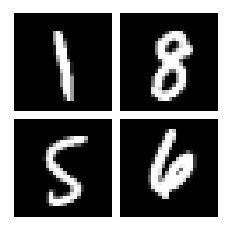

In [38]:
# TODO: Plot MNIST Images in 2x2 grid
def show_imgs(inp):
    inp = inp.numpy().transpose((1,2,0))
    plt.axis('off')
    plt.imshow(inp)


imgs, labels = next(iter(train_loader))

show_imgs(torchvision.utils.make_grid(imgs[:4], nrow=2, pad_value=1))
    
    

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> LSTM network for MNIST image Classification  </span></h1>
</div>

### Initialize an LSTM Model Using Pytorch's nn.LSTM() Class
Create an  LSTM model for classification of MNIST images. Follow the structure given below;

1. One LSTM Cell
2. One Linear Fully-Connected Layer


Read Pytorch [documentation]( https://pytorch.org/docs/stable/nn.html?highlight=lstm#torch.nn.LSTM) to learn about **nn.LSTM()**.

In [11]:
class LSTMModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        
        super(LSTMModel, self).__init__()
        
        
        # Hidden dimensions: Number of features in hidden/cell state
        self.hidden_dim = hidden_dim
        
        
        
        # Number of LSTM cells/layers 
        self.layer_dim = layer_dim

        
        
        # Declaring attributes of model for LSTM cell and read-out linear fully-connected layer
        self.lstm = None
        self.fc   = None

        
        
        # TODO: Intialize LSTM and linear layer
             
        
        # Initialize LSTM Cell/s
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim,  batch_first=True)
        
        
        
        # Readout fully-connected layer. It takes hidden state from last time step and converts this hidden state to logits
        self.fc = nn.Linear(hidden_dim, output_dim)                                     
        

    
    def forward(self, x):
        
        # Assuming batch_first=True
        # x       : input consists of a sequence or a batch of sequences.   shape: (batch, seq_len, features)
        #         : batch = number of sequences in one batch ,      seq_len = number of time steps       ,  features= number of features in one part sequence at each time step
        
        
        
        
        # Everytime when model is called, intial hidden state and cell state would be initialized with zeros
        
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)     # shape: (num_layers * num_directions, batch, hidden_size)
        # Initialize cell state with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)     # shape: (num_layers * num_directions, batch, hidden_size)
        
        
        # x       : input consists of a sequence of batch of sequences.   shape: (batch, seq_len, features)                         Assuming batch_first=True
        # out     : tensor containing hidden states from all time steps.  shape: (batch, seq_len,  num_directions * hidden_size)    Assuming batch_first=True
        # (hn,cn) : hidden state and cell state after last time-step.     shape: (num_layers * num_directions, batch, hidden_size)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        
        # Take hidden state from last time step and convert it to logits using fully-connected layer
        out = self.fc(out[:, -1,:]) 
        
        
        return out

### Instantiate Model Class

In [12]:
input_dim  = 28      # Number of elements in each part of sequence. 
hidden_dim = 100     # Number of elements in hidden/cell state
layer_dim  = 1       # Number of LSTM Cells
output_dim = 10      # Number of classes,  There are 10 classes in MNIST dataset (Digits: 0,1,2,...9)



model = LSTMModel( input_dim, hidden_dim, layer_dim, output_dim)


### Instantiate Loss Class
We are going to use **Cross Entropy Loss** for this classifcation problem.   

In [13]:
criterion = nn.CrossEntropyLoss()

### Instantiate Optimizer Class


- Simplified equation
    - $ \boldsymbol{\theta} $ = $\boldsymbol{\theta} - \eta \cdot \nabla_{\boldsymbol{\theta}} $
        - $ \boldsymbol{\theta} $: parameters (learnable variables/parameters)
        - $\eta $: learning rate (how fast we want to learn)
        - $\nabla_{\boldsymbol{\theta}}$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [14]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [15]:
len(list(model.parameters()))

6

In [16]:
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([400, 28])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([10, 100])
torch.Size([10])


### Understanding LSTM Training

Firstly lets see how image passes through LSTM and loss is calculate.

1. Firstly, we have converted 28x28 image into sequence of 28 1x28 image strips.
2. At each time step, we feed LSTM 1x28 image strip and update hidden state and cell state.
3. After passing all the 28 1x28 sequence of image parts, we take the final hidden state and pass it as input to a fully connected layer.
4. The fully-connected layer outpus, 10 logits(unnormalized scores) for iamge classes.
5. We use softmax to normalize the scores and calculate Cross Entropy Loss

In case of backward pass, gradient flows from final time step to initial time step of LSTM and gradients of parameters are added together.



### Train Model
- Process 
    1. Take one sequence or batch of sequences
    2. Clear gradient buffers
    3. Get output by forward-passing input through model/network
    4. Compute **cross-entropy** loss using labels and output of network
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In this homework, we will feed an LSTM cell an entire MNIST image in the form of a sequence of 28 rows and then classify the image. Data can be viewed as a set of $N$ examples $\{(\mathbf{x_i},y_i)\}_{i=1}^{N}$. In each pair $(\mathbf{x_i},y_i)$, $\mathbf{x_i} = \langle \mathbf{x_{i,1}}, \mathbf{x_{i,2}},\dots, \mathbf{x_{i,28}}\rangle$ is a sequence of 28 vectors, each of dimension $(1,28)$.<br>


### Training Loop

In [17]:
# Number of time steps or Number of constituents of one sequence
seq_len = 28  



iteration = 0


for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        # Shape of images = (batch_size, num_channels, 28, 28)
        # Shape of images = (batch_size, 1           , 28, 28)
        
        # Reshape batch of images into batch of sequences,    
        inputs = images.view(-1, seq_len, input_dim)  # shape: (batch, seq_len, input_features)
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        
        
        # Forward pass to get output/logits
        outputs = model(inputs)
        
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        
        # Updating parameters
        optimizer.step()
        
        
        
        iteration += 1
        
        
        # Test Accuracy on Test Data
        if iteration % 500 == 0:
            with torch.no_grad():   #  We do not want to add following operations in computation graph.
                
                
                correct = 0
                total = 0


                # Iterate through test dataset
                for images, labels in test_loader:

                    # Shape of images = (batch_size, num_channels, 28, 28)
                    # Shape of images = (batch_size, 1           , 28, 28)
                    
                    # Reshape batch of images into batch of sequences
                    inputs = images.view(-1, seq_len, input_dim)   # shape: (batch, seq_len, input_features)
        
        

                    # Forward pass only to get logits/output
                    outputs = model(inputs)

                    # Get predictions from outputs
                    _, predicted = torch.max(outputs, 1)

                    
                    # Total number of labels
                    total += labels.size(0)

                    
                    # Total correct predictions
                    correct += (predicted == labels).sum()

                accuracy = 100 * correct.item() / total

                # Print Loss
                print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iteration, loss.item(), accuracy))

Iteration: 500. Loss: 2.2586429119110107. Accuracy: 18.17
Iteration: 1000. Loss: 0.9691744446754456. Accuracy: 68.57
Iteration: 1500. Loss: 0.44801756739616394. Accuracy: 86.61
Iteration: 2000. Loss: 0.3086774945259094. Accuracy: 92.14
Iteration: 2500. Loss: 0.17383822798728943. Accuracy: 94.45
Iteration: 3000. Loss: 0.17661446332931519. Accuracy: 94.38


### Convert .IPYNB to .HTML 

In [ ]:
import os 
cwd = os.getcwd()
os.chdir(cwd)

!jupyter nbconvert HW4_msds19041.ipynb